In [1]:
import numpy as np
import matplotlib.pylab as plt

# 準備模擬的資料

## 做一條直線
## 例如 f(x) = 1.2x + 0.8

In [2]:
x = np.linspace(0,5,50)

In [3]:
y = 1.2*x + 0.8

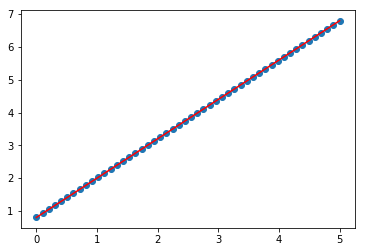

In [5]:
plt.scatter(x, y)
plt.plot(x, y, c = 'r')
plt.show()

# 增加noise

In [6]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

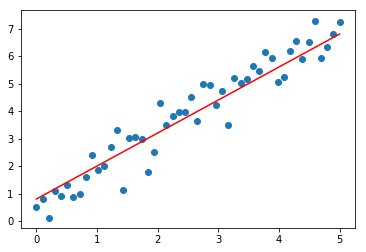

In [9]:
plt.scatter(x, y)
plt.plot(x, 1.2*x+0.8,'r')
plt.show()

# 假資料真回歸

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# 打開機器
regr = LinearRegression()

In [13]:
X = x.reshape(50,1)

In [15]:
# 訓練機器
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# 預測
Y = regr.predict(X)

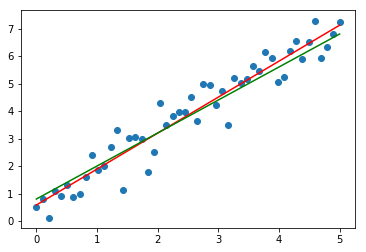

In [19]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')
plt.plot(x, 1.2*x+0.8, 'g')
plt.show()

# overfitting 將資料學的太像了

In [22]:
x = np.linspace(0, 5, 50)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

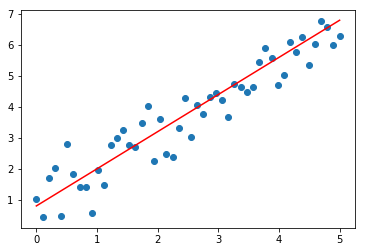

In [26]:
plt.scatter(x, y)
plt.plot(x, 1.2*x + 0.8, c='r')
plt.show()

In [27]:
X = np.linspace(0, 5, 1000)
def my_fit(n):
    Y = 4*np.sin(n*X) + 4
    plt.scatter(x, y)
    plt.plot(X, Y, 'r')
    plt.show()

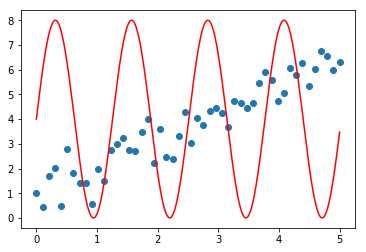

In [28]:
my_fit(5)

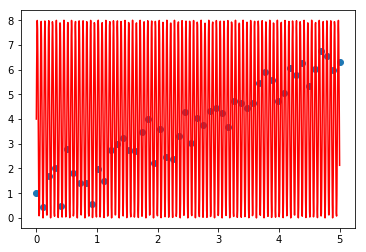

In [35]:
my_fit(100)

# 如何知道什麼叫做overfitting

In [36]:
x = np.linspace(0, 5, 100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)

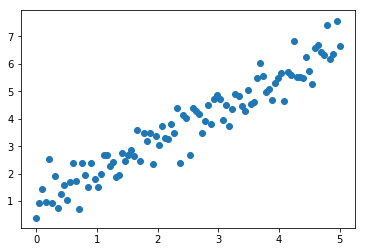

In [37]:
plt.scatter(x, y)
plt.show()

# 如果某個預測在自身訓練時訓練得非常準，但是拿到實際上預測結果不太好
# 這個情況通常都是overfitting
# 但是實際上未發生的事情怎麼知道預測的準不準
# 這時候就會使用一個小技巧
# 就是將資料分成訓練資料跟測試資料
# 使用測試資料來驗證是否有overfitting

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 87)

In [40]:
x_train = x_train.reshape(40,1)

In [41]:
x_test.shape = (10,1)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regr = LinearRegression()

In [44]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

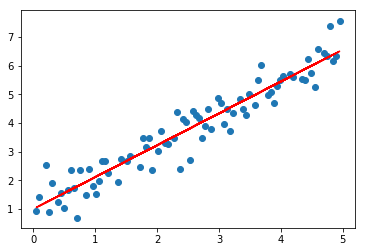

In [47]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train),'r')
plt.show()

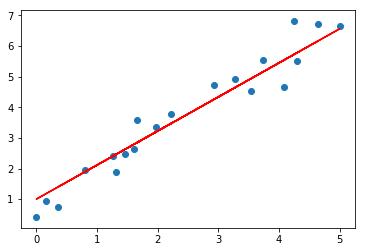

In [48]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), 'r')
plt.show()